# Project 8: Data Preprocessing & Feature Engineering for Machine Learning (Housing Dataset)

# Project Brief for Self-Coders

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Data Import and first Inspection

1. __Import__ the housing dataset (housing.csv) and __inspect__!

In [33]:
data = pd.read_csv('housing.csv')
data['ocean_proximity'].unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [34]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


__Features__:

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

## Data Cleaning and Creating additional Features

2. __Drop__ all rows with (at least one) missing value(s).

In [36]:
data[data.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [37]:
data.dropna(inplace=True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


3. __Add__ the additional Feature __"rooms_per_household"__ (should be self-explanatory)

In [39]:
data[data['households'] == 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [40]:
data['rooms_per_household'] = data['total_rooms'].div(data['households'])
data['rooms_per_household'].head()

0    6.984127
1    6.238137
2    8.288136
3    5.817352
4    6.281853
Name: rooms_per_household, dtype: float64

4. __Add__ the additional Feature __"population_per_household"__ (should be self-explanatory)

In [41]:
data['population_per_household'] = data['population'].div(data['households'])

5. __Add__ the additional Feature __"bedrooms_per_household"__ (should be self-explanatory)

In [42]:
data['bedrooms_per_household'] = data['total_bedrooms'].div(data['households'])

## Which Factors influence House Prices?

6. __Calculate__ the __Correlation__ between "median_house_value" and all features. Which factors seems to influence house prices/values?

`Median income` seems to have high correlation with house value.

In [43]:
data.corr()['median_house_value'].sort_values(ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15388\417173335.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['median_house_value'].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.688355
rooms_per_household         0.151344
total_rooms                 0.133294
housing_median_age          0.106432
households                  0.064894
total_bedrooms              0.049686
population_per_household   -0.023639
population                 -0.025300
longitude                  -0.045398
bedrooms_per_household     -0.046739
latitude                   -0.144638
Name: median_house_value, dtype: float64

7. __Create__ a Seaborn Regression plot (__jointplot__) with income on the x-axis and house value on the y-axis.

<Figure size 1200x900 with 0 Axes>

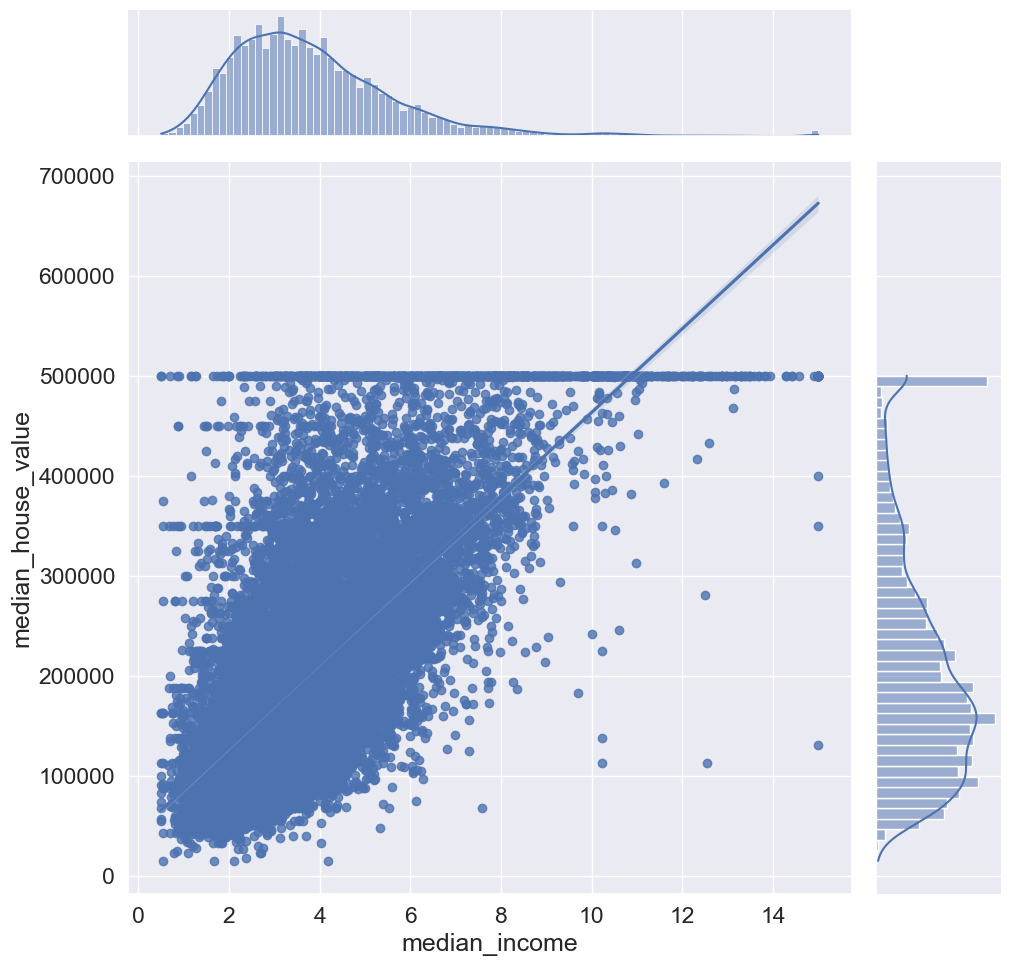

In [44]:
plt.figure(figsize=(12,9))
sns.set(font_scale=1.5)
sns.jointplot(data = data, x = 'median_income', y = 'median_house_value', kind  = 'reg',height=10)

8. __Create__ the following __scatterplot__ (df.plot(kind = "scatter")) with
- longitude on x-axis
- latitude on y-axis
- size (s) of data points determined by population
- color (c) of data points determined by median_house_value

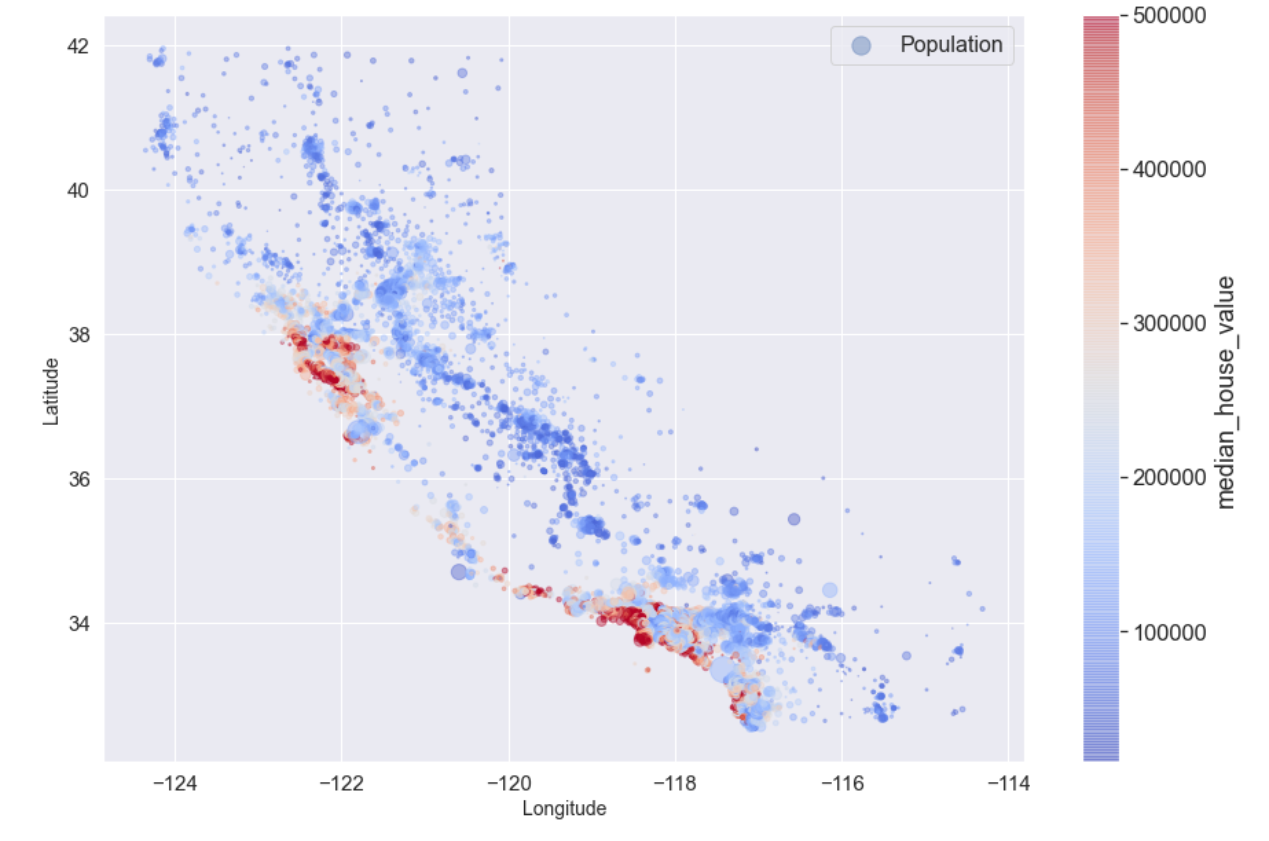

<Axes: xlabel='longitude', ylabel='latitude'>

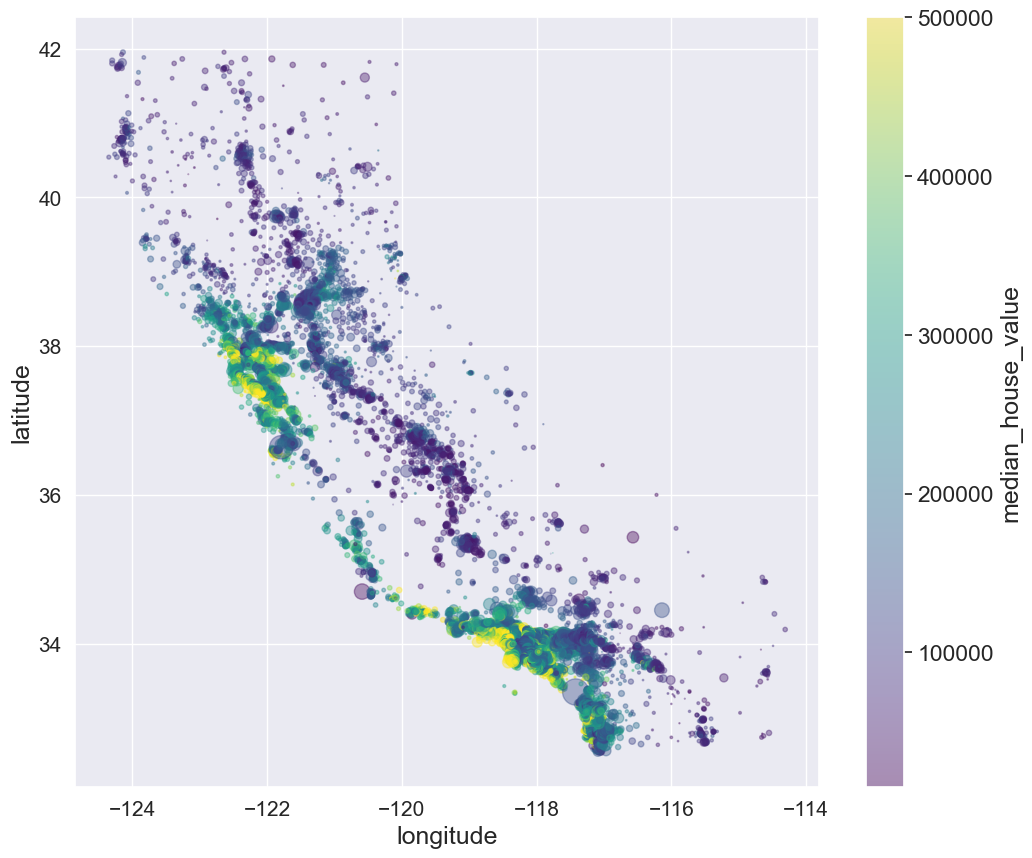

In [45]:
data.plot(x = 'longitude', y= 'latitude',kind='scatter',s = data['population']/100, c = 'median_house_value',figsize=(12,10),
          colorbar=True, alpha=0.4, fontsize = 15, sharex = False, colormap='viridis')

9. Does this look familiar to you? It´s California. Let´s __add the map__ of California saved in __california.png__.

Hint: You can load and display the image california.png with the right latitude/longitude as follows:

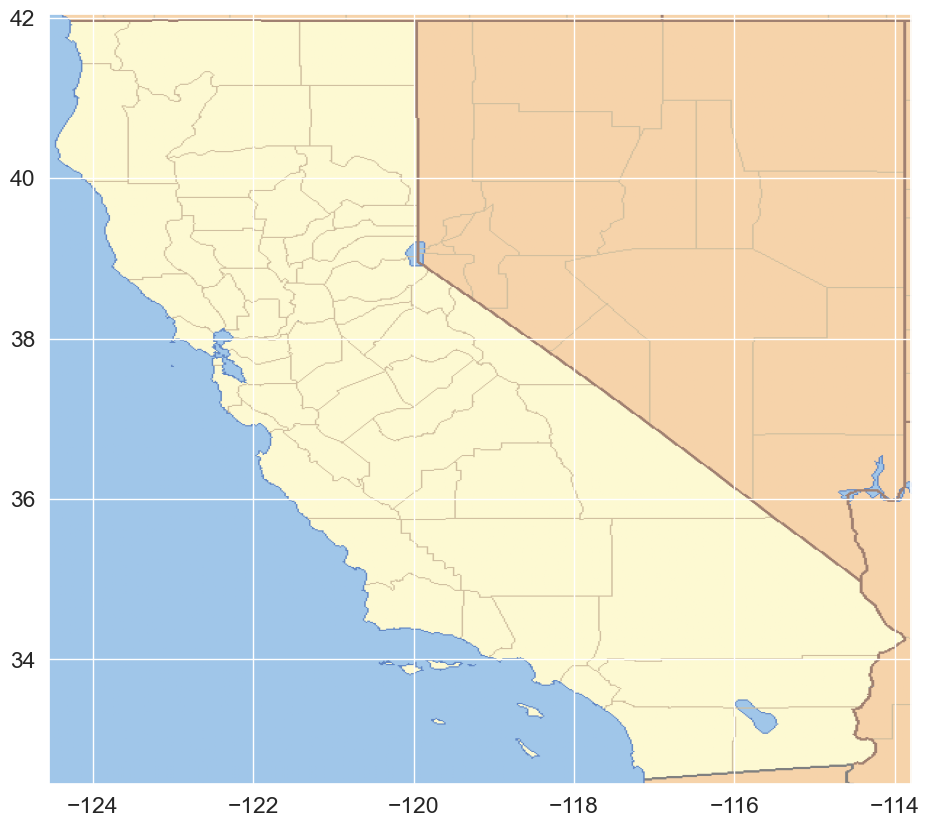

In [46]:
import matplotlib.image as mpimg
california_img = mpimg.imread("california.png")
plt.figure(figsize = (15, 10))
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05])
plt.show()

The final plot should look like this:

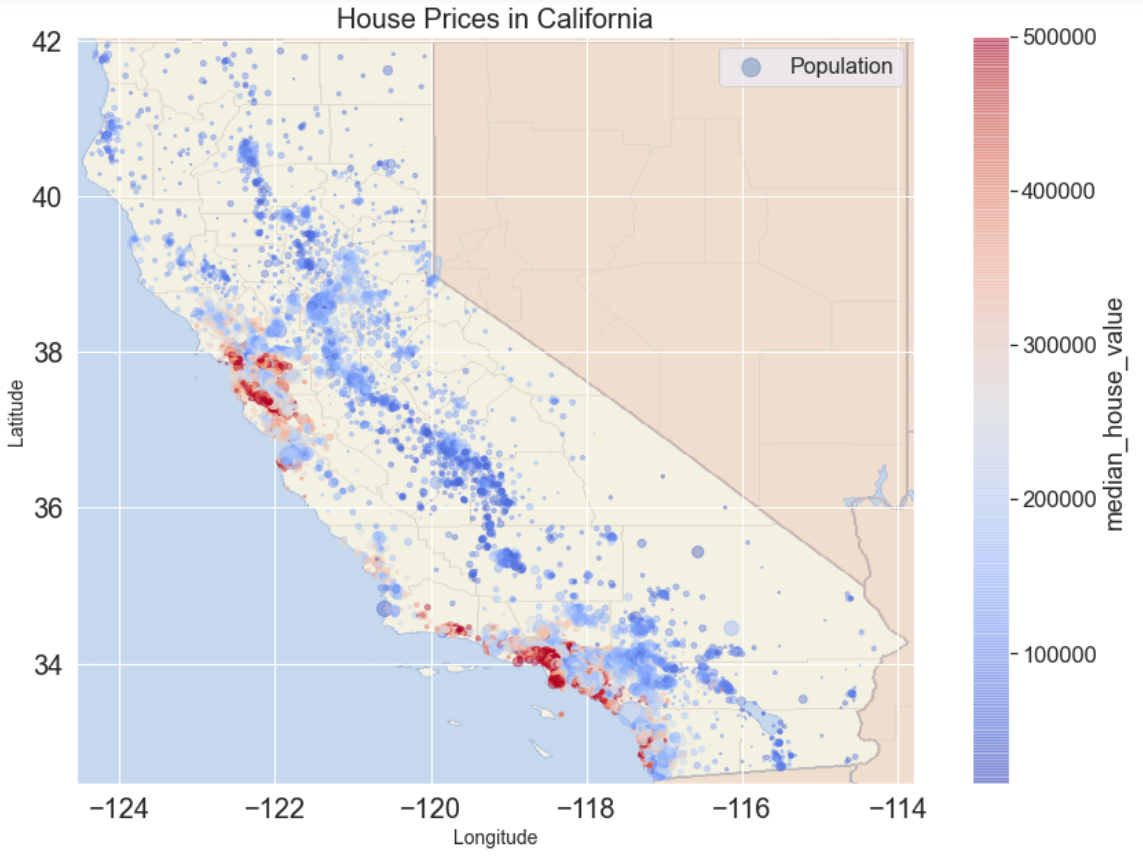

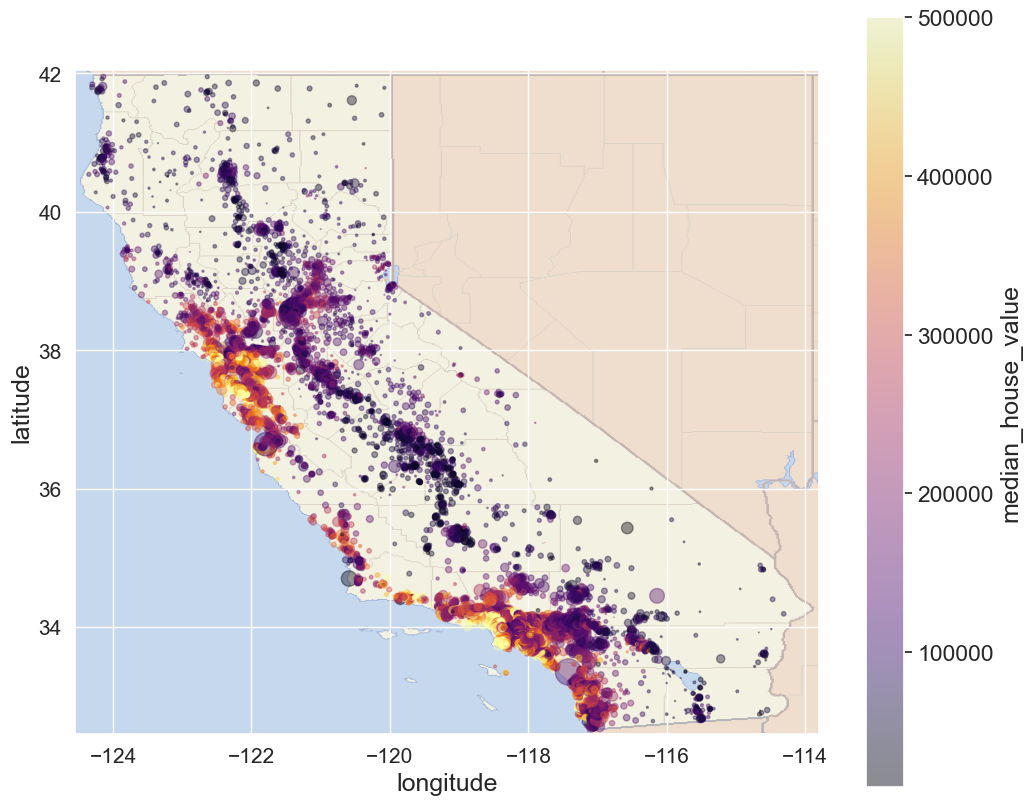

In [47]:
data.plot(x = 'longitude', y= 'latitude',kind='scatter',s = data['population']/100, c = 'median_house_value',figsize=(12,10),
          colorbar=True, alpha=0.4, fontsize = 15, sharex = False, colormap='inferno')
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

## Advanced Explanatory Data Analyis with Seaborn

10. __Add__ the additional column __"income_cat"__ with the following income categories:
- lowest 25% -> "Low"
- 25th to 50th percentile -> "Below_Average"
- 50th to 75th percentile -> "Above_Average"
- 75th to 95th percentile -> "High"
- Above 95th percentile -> "Very High"

In [48]:
data['income_cat'] = pd.qcut(data['median_income'], q =[0, 0.25,0.5,0.75,0.95,1],labels=['Low','Below_Average','Above_Average','High','Very_High'])
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_household,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,1.023810,Very_High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.971880,Very_High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,1.073446,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,1.073059,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,1.081081,Above_Average


11. __Create__ (and interpret) the following Seaborn __Countplots__:

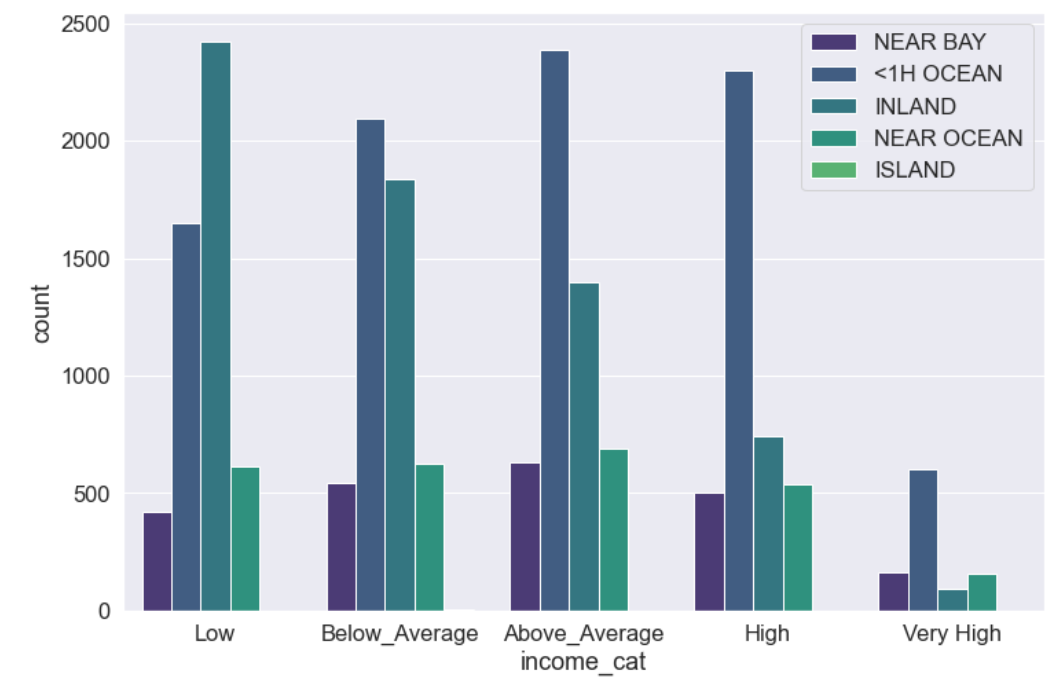

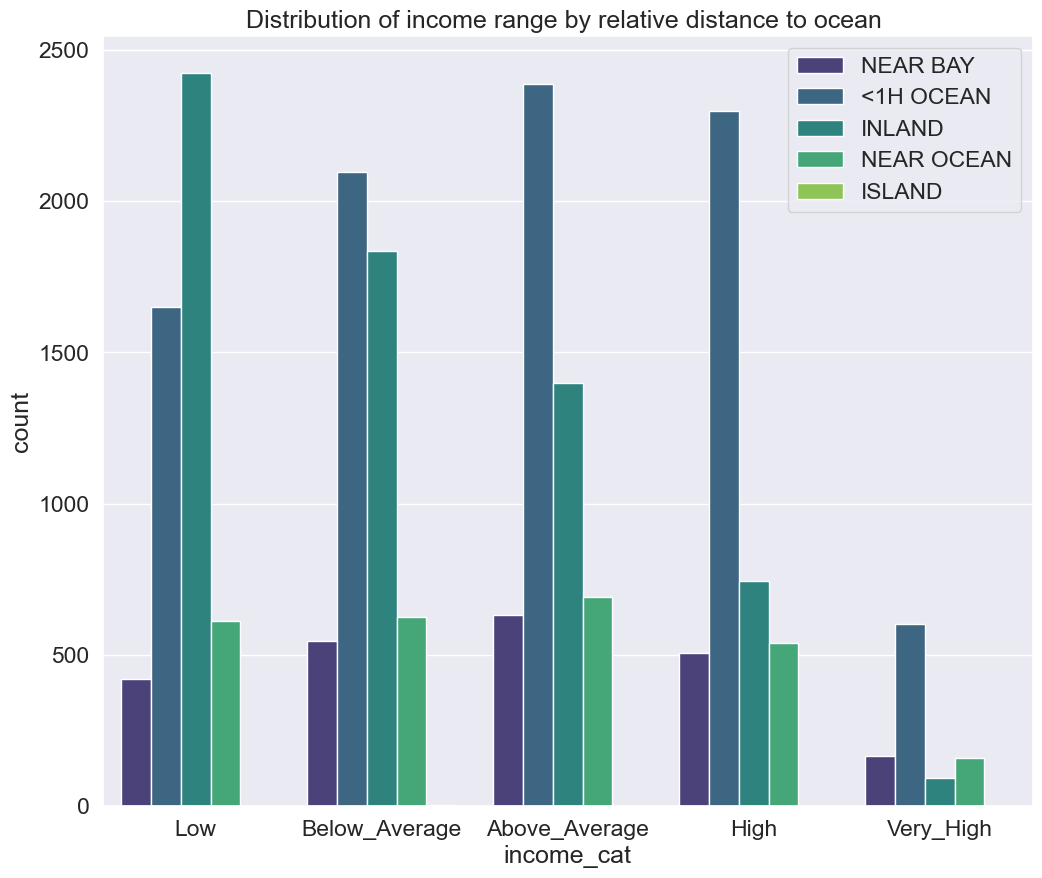

In [49]:
plt.figure(figsize=(12,10))
sns.countplot(data = data, x = 'income_cat', hue = 'ocean_proximity',palette='viridis').set_title('Distribution of income range by relative distance to ocean ')
plt.legend(loc = 1)
#plt.title('Distribution of categories of income range by relative distance to ocean ', )

Text(0.5, 1.0, 'Distribution of income range and median house value')

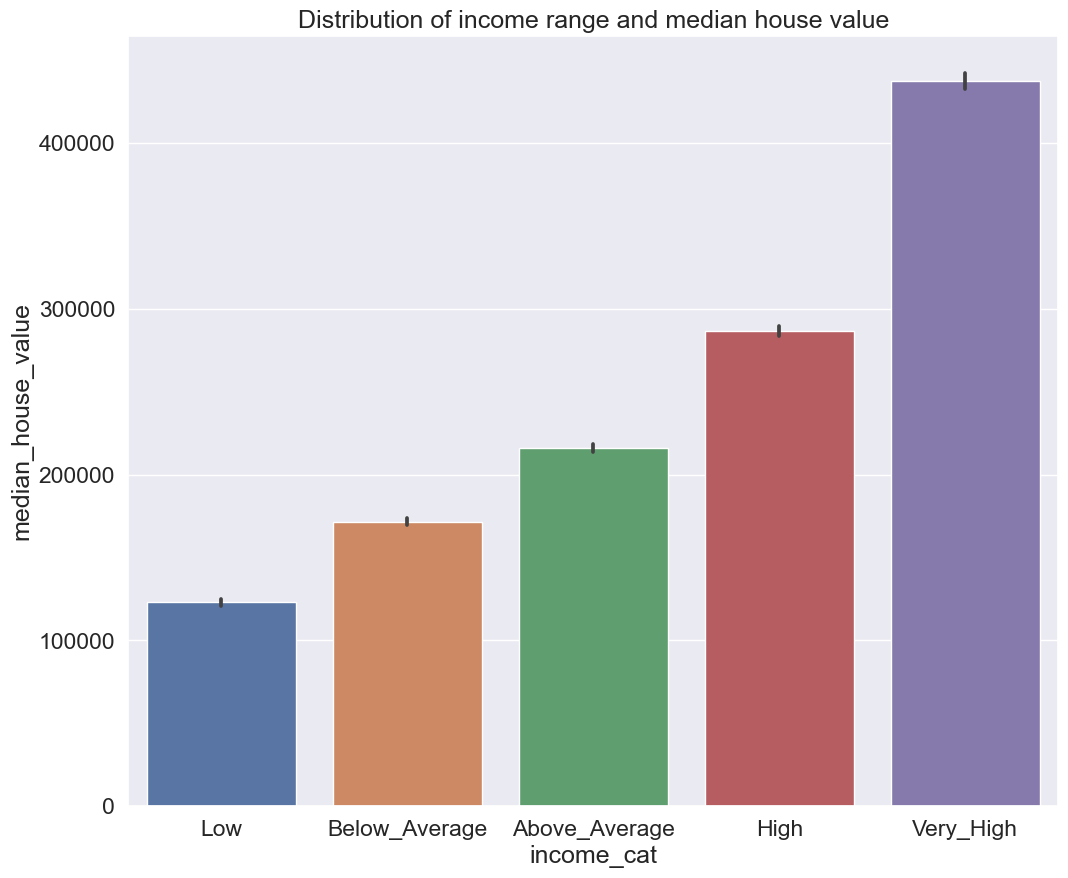

In [50]:
plt.figure(figsize = (12,10))
sns.barplot(data = data, x = 'income_cat', y = 'median_house_value').set_title('Distribution of income range and median house value')

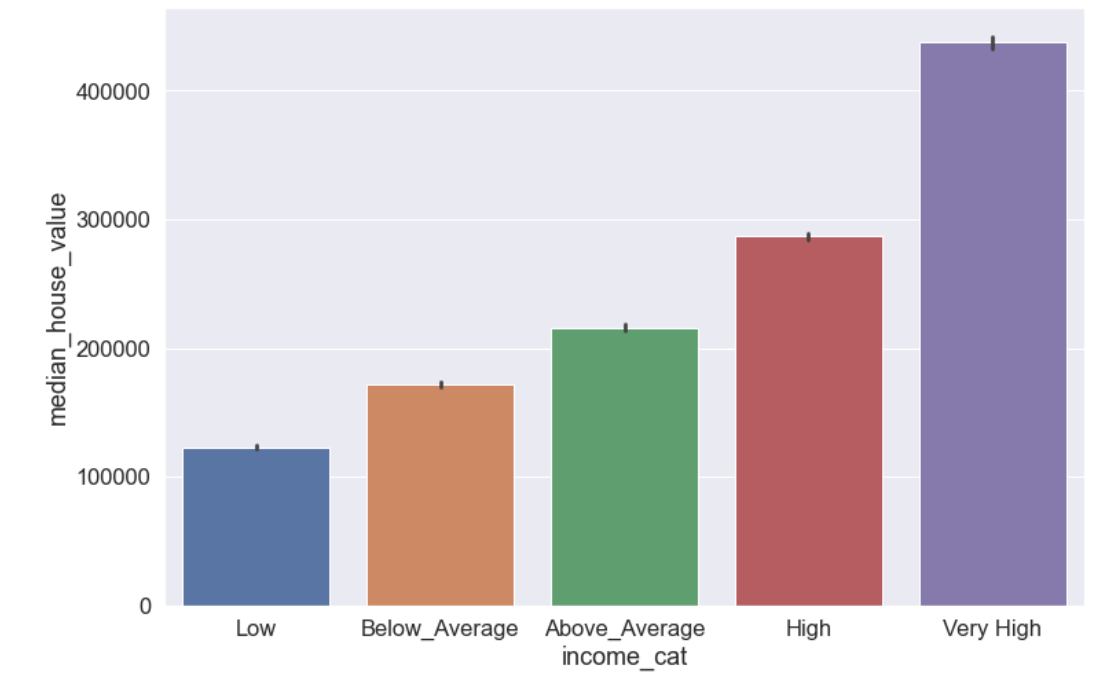

Text(0.5, 1.0, 'Distribution of distance to ocean and median house value')

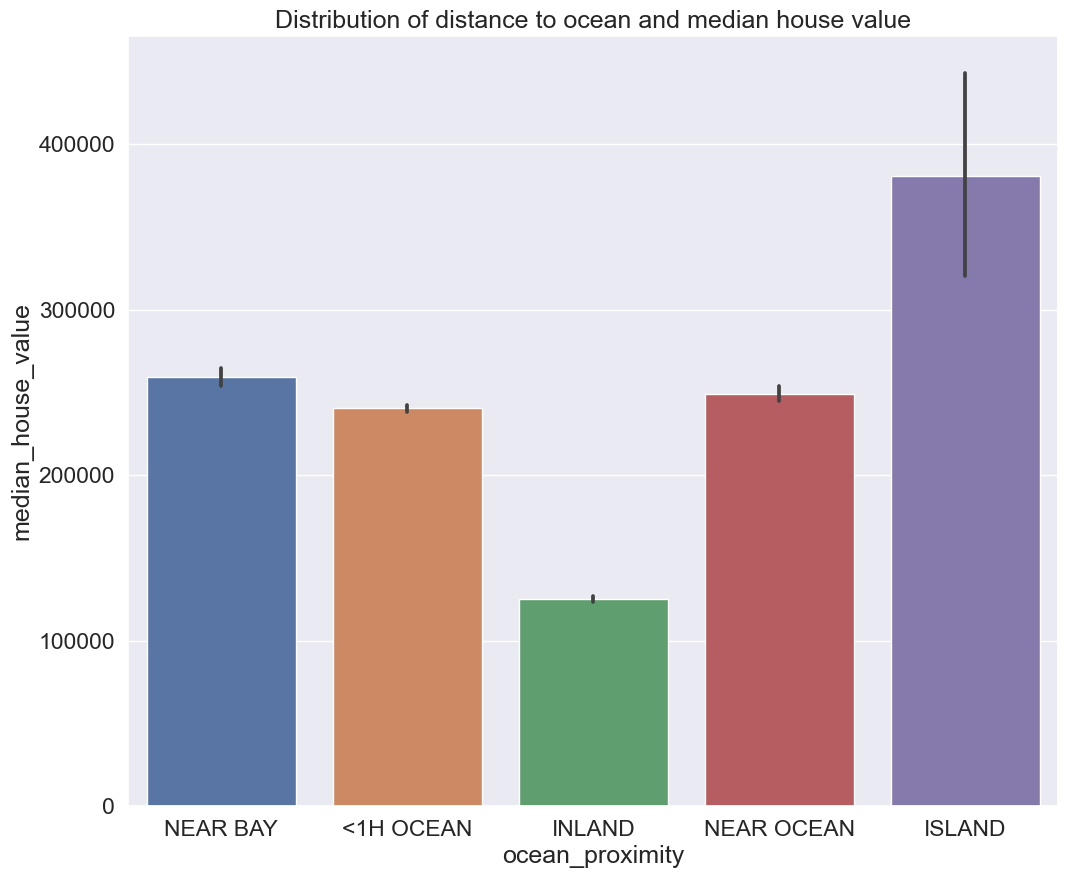

In [51]:
plt.figure(figsize = (12,10))
sns.barplot(data = data, x = 'ocean_proximity', y = 'median_house_value').set_title('Distribution of distance to ocean and median house value')

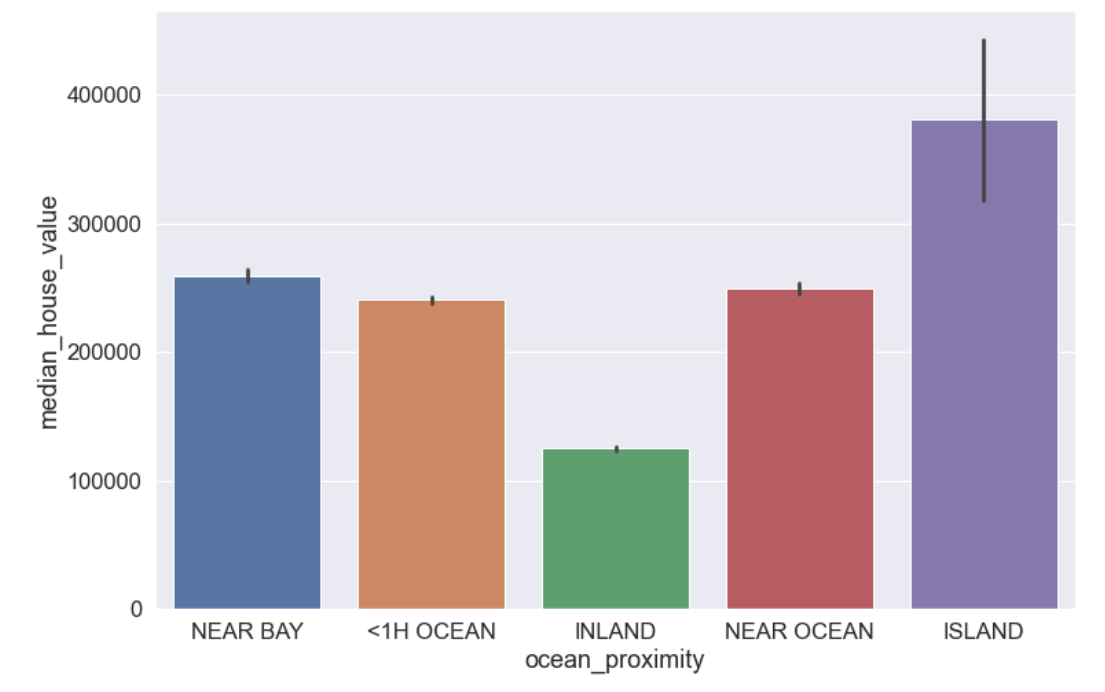

12. __Create__ (and interpret) the following Seaborn __Heatmap__ with mean house values for all combinations of income_cat & ocean_proximity:

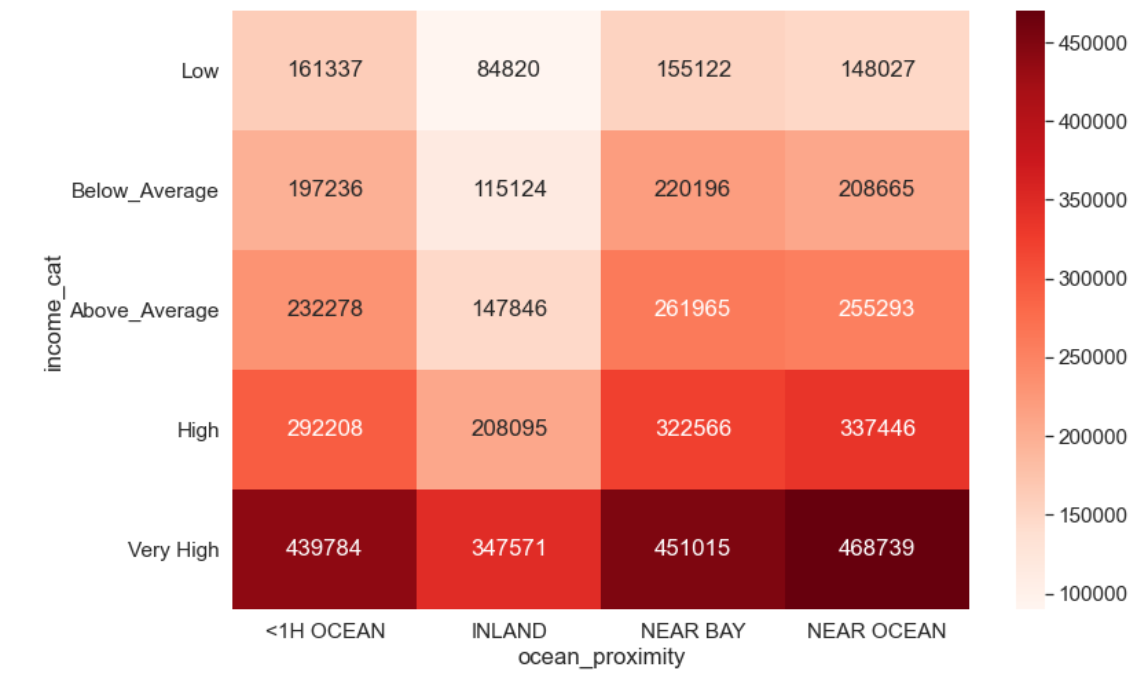

In [52]:
matrix = data.groupby(['income_cat','ocean_proximity'])['median_house_value'].mean().unstack().drop(columns = 'ISLAND')

Text(0.5, 1.0, 'Distribution of income range and median house value')

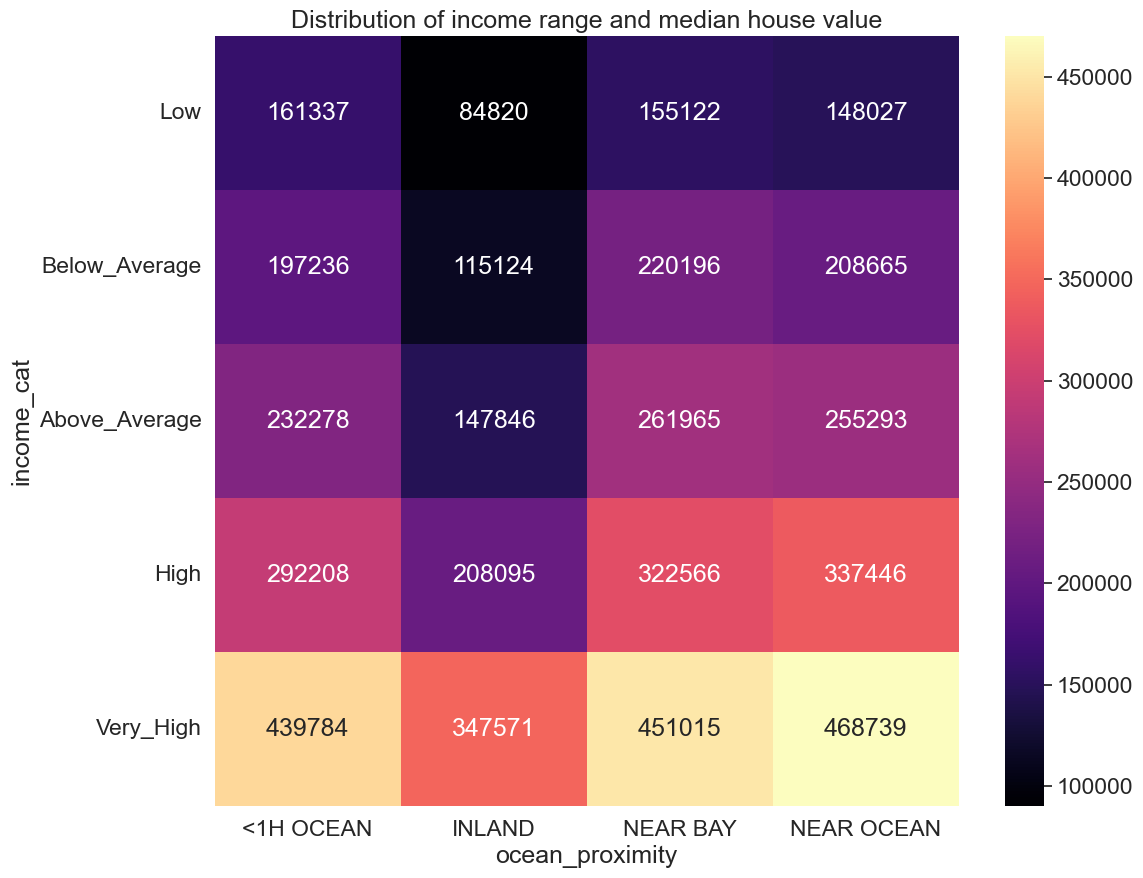

In [53]:
plt.figure(figsize = (12,10))
sns.heatmap(data = matrix.astype('int'),cmap = 'magma',annot=True,vmin = 90000, vmax = 470000,fmt = 'd').set_title('Distribution of income range and median house value')

## Machine Learning - Predicting House Values (optional)

Based on the Explanatory Data Analysis, <br>
- select an appropriate ML Model => RandomForest Regression
- split into Train and Test Set
- prepare/engineer Features
- Fit the Model (Train Set)
- Test the Model (Test Set)

In [63]:
feature = data.drop(columns = 'median_house_value').copy()
feature.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_household,income_cat
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,NEAR BAY,6.98,2.56,1.02,Very_High
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,NEAR BAY,6.24,2.11,0.97,Very_High
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,NEAR BAY,8.29,2.80,1.07,High
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,NEAR BAY,5.82,2.55,1.07,High
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,NEAR BAY,6.28,2.18,1.08,Above_Average


In [64]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20433 non-null  float64 
 1   latitude                  20433 non-null  float64 
 2   housing_median_age        20433 non-null  float64 
 3   total_rooms               20433 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20433 non-null  float64 
 6   households                20433 non-null  float64 
 7   median_income             20433 non-null  float64 
 8   ocean_proximity           20433 non-null  object  
 9   rooms_per_household       20433 non-null  float64 
 10  population_per_household  20433 non-null  float64 
 11  bedrooms_per_household    20433 non-null  float64 
 12  income_cat                20433 non-null  category
dtypes: category(1), float64(11), object(1)
memory 

In [55]:
feature_2 = feature.select_dtypes('float').copy()
feature_2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,2.555556,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,2.109842,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,2.802260,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,2.547945,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,2.181467,1.081081


In [61]:
import scipy.stats as stats
pd.options.display.float_format = '{:.2f}'.format
feature_std = feature_2.apply(lambda x: stats.zscore(x))

In [62]:
feature_std.agg(['mean','std'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [66]:
dummies = pd.get_dummies(feature['ocean_proximity'])
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [75]:
feature_3 = pd.concat([feature_2,dummies], axis=1)
feature_3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,6.98,2.56,1.02,0,0,0,1,0
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,6.24,2.11,0.97,0,0,0,1,0
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,8.29,2.80,1.07,0,0,0,1,0
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,5.82,2.55,1.07,0,0,0,1,0
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,6.28,2.18,1.08,0,0,0,1,0


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_3, data['median_house_value'], test_size=0.33, random_state=215)

In [74]:
X_train['income_cat'].value_counts(normalize = True)

Below_Average   0.25
Low             0.25
Above_Average   0.25
High            0.20
Very_High       0.05
Name: income_cat, dtype: float64

In [77]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators= 500, max_features= 'sqrt', max_depth=75,min_samples_split=2)


In [78]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500)

In [79]:
rfr.score(X_train,y_train)

0.9749619581442395

In [92]:
pred = rfr.predict(X_test)
pred

array([333371.9  , 168810.2  , 152267.6  , ..., 456826.598, 263565.838,
       178795.8  ])

In [93]:
from sklearn.metrics import mean_squared_error
import numpy as np
rfr_mse  = mean_squared_error(y_test,pred)
rfr_rmse = np.sqrt(rfr_mse)

In [94]:
rfr_rmse

47752.07913627279